In [152]:
# install the faiss and clone git repository
!faiss-cpu
!git clone https://github.com/leslliesayrus/owshq_vector_databases_llm.git

/bin/bash: line 1: faiss-cpu: command not found
Cloning into 'owshq_vector_databases_llm'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 39 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (39/39), 1.75 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [157]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import os
import faiss

In [154]:
folder_photos = "/content/owshq_vector_databases_llm/photos"

In [155]:
# download the model for transform image in vectors
resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [156]:
images = []
embeddings = []

for i in os.listdir(folder_photos):
  print(i)

  image_path = f'{folder_photos}/{i}'
  image = Image.open(image_path)
  images.append(image)
  image = preprocess(image)
  image = image.unsqueeze(0)  # Adicione uma dimensão para criar um lote (batch)

  # Execute a imagem através do modelo ResNet
  with torch.no_grad():
      embedding = resnet_model(image)
  embeddings.append(embedding)

dog_04.jpg
cat_05.jpg
airplane_03.jpg
cat_02.jpg
dog_05.jpg
dog_01.jpg
airplane_01.jpg
cat_01.jpg
cat_04.jpg
airplane_05.jpg
dog_02.jpg
airplane_04.jpg
dog_03.jpg
airplane_02.jpg
cat_03.jpg


In [178]:
images[0].resize((128,128))

(<PIL.Image.Image image mode=RGB size=128x128>, torch.Size([1, 1000]))

In [184]:
print("shape of the embedding", embeddings[0].shape)
print("example: " ,embeddings[0][0][0:10])



shape of the embedding torch.Size([1, 1000])
example:  tensor([-0.3791,  0.3662, -2.7472, -2.4198, -2.1362, -2.5777, -3.5575, -1.0800,
        -0.7854, -0.8402])


In [158]:
# add embeddings into the vector database
index = faiss.IndexFlatL2(1000)
for i in embeddings:
  index.add(i)

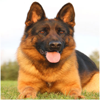

In [185]:
# choice a image by index
# number K is K Nearest Neighbors
index_image = 5
k = 4
images[index_image].resize((100,100))

In [171]:
# make the search
distance, indices = index.search(embeddings[index_image],k)

In [172]:
# distance and image of the image
for i in range(len(indices[0])):
  print(f"distance {distance[0][i]}", f"index image: {indices[0][i]}")

distance 0.0 index image: 5
distance 1300.851806640625 index image: 4
distance 3842.0654296875 index image: 0
distance 5305.3916015625 index image: 12


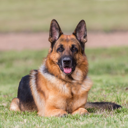

In [173]:
images[indices[0][1]].resize((128,128))

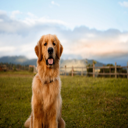

In [174]:
images[indices[0][2]].resize((128,128))

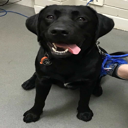

In [175]:
images[indices[0][3]].resize((128,128))